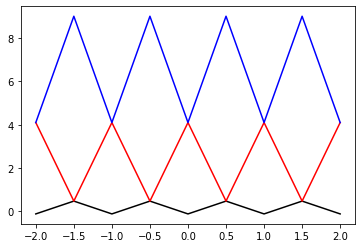

In [338]:
import numpy as np
from math import *
from scipy.special import mathieu_a, mathieu_cem
import matplotlib.pyplot as plt
from sympy import mathieuc, mathieus

def kidxRAW(m, ng):
    if ng==0:
        return m + 1.0 - ((m+1.0)%2.0) 
    else:
        return m + 1.0 - ((m+1.0)%2.0) + 2.0*ng*((-1.0)**(m - 0.5*(np.sign(ng)-1.0)))
        #return m + 1.0 - ((m+1.0)%2.0) + 2.0*ng*((-1.0)**m)

def kidx(m, ng):
    return kidxRAW(m, ng) # need -0.5 offset here

# define the Josephson to charging energy ratio E_J / E_C
ratio = 1.0
E_C = 1.0 # placeholder 

# for debugging only 
index_list = [] 

def energy(m,ng):
    index = kidx(m,ng)
    index_list.append(index)
    return (E_C)*mathieu_a(index, -0.5*ratio)
    #return (E_C)*mathieu_cem(index, -0.5*ratio, 2.0)[0]
    #return (E_C)*mathieus(index,-0.5*ratio, 2.0)

# extremely coarse grid: only three points 
ng = np.linspace(-0.5,0.5,3)
ng_periodic = np.linspace(-2.0, 2.0,9)

# define energies between (-0.5, 0.5) 
E0 = []
E1 = []
E2 = [] 

# define periodic energies between (-2.0, 2.0) 
E0_periodic = [None]*9
E1_periodic = [None]*9
E2_periodic = [None]*9

# calculate the energies for m=0,1,2
for i in ng:
    E0.append(energy(0,i))
    E1.append(energy(1,i))
    E2.append(energy(2,i)) 
 
# define the periodic eigen energies based on the values between (-0.5,0.5) 
for i in range(len(E0_periodic)):  
    E0_periodic[0] = E0[1] 
    E0_periodic[1] = E0[0]
    E1_periodic[0] = E1[1]
    E1_periodic[1] = E1[0] 
    E2_periodic[0] = E2[1]
    E2_periodic[1] = E2[0] 
    
    if i > 1:
        E0_periodic[i] = E0_periodic[i-2]
        E1_periodic[i] = E1_periodic[i-2]
        E2_periodic[i] = E2_periodic[i-2] 

# plot the eigen energies between (-0.5, 0.5) 
#plt.plot(ng, E0, 'k') # m=0
#plt.plot(ng, E1, 'r') # m=1 
#plt.plot(ng, E2, 'b') # m=2 

# plot the PERIODIC eigen energies between (-2.0, 2.0) 
plt.plot(ng_periodic, E0_periodic, 'k') # m=0 
plt.plot(ng_periodic, E1_periodic, 'r') # m=1
plt.plot(ng_periodic, E2_periodic, 'b') # m=2 